# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/1/30

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [1]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
#key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"
key_api_ECOS = 'X86F3N6MT6RRYXJ35P87'

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정 (utils, figures 등)
UTILS = f"{BASE}/utils"
FIGS  = f"{BASE}/figures"

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [2]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures


## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


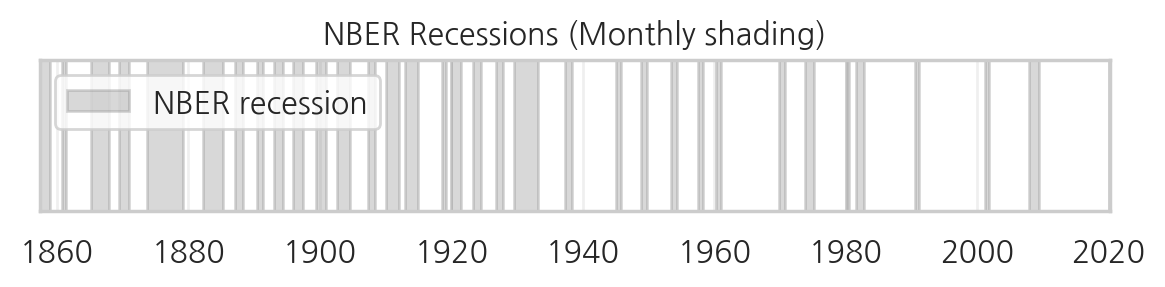

In [3]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

# Main

## 미국 주택가격

In [4]:
# All-Transactions House Price Index for the United States  (USSTHPI)
# All-Transactions House Price Index for Arizona  (AZSTHPI)
# All-Transactions House Price Index for California  (CASTHPI)
# All-Transactions House Price Index for Florida  (FLSTHPI)
# All-Transactions House Price Index for Nevada  (NVSTHPI)

var_list = ['USSTHPI', 'AZSTHPI','CASTHPI','FLSTHPI','NVSTHPI']
start = date(1985,1,1)
end = date(2024,12,31)

df = pdr.get_data_fred(var_list, start=start, end=end)
df_normalized = 100*df / df.iloc[0]

print(df.head())
print(df.tail(3))

print(df.info())

            USSTHPI  AZSTHPI  CASTHPI  FLSTHPI  NVSTHPI
DATE                                                   
1985-01-01  124.740  124.340  124.490  127.880  119.250
1985-04-01  126.630  124.720  126.260  128.260  117.550
1985-07-01  128.600  126.240  129.140  128.090  119.270
1985-10-01  130.060  128.110  130.520  129.860  120.510
1986-01-01  132.570  130.630  132.230  131.280  123.990
            USSTHPI  AZSTHPI  CASTHPI  FLSTHPI  NVSTHPI
DATE                                                   
2024-04-01  676.790  713.910  950.840  813.260  620.840
2024-07-01  683.840  719.230  959.950  818.360  624.770
2024-10-01  687.630  720.490  964.030  827.040  630.200
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 1985-01-01 to 2024-10-01
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   USSTHPI  160 non-null    float64
 1   AZSTHPI  160 non-null    float64
 2   CASTHPI  160 non-null    float64
 3   FLSTHPI  1

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/housingprice_us.png


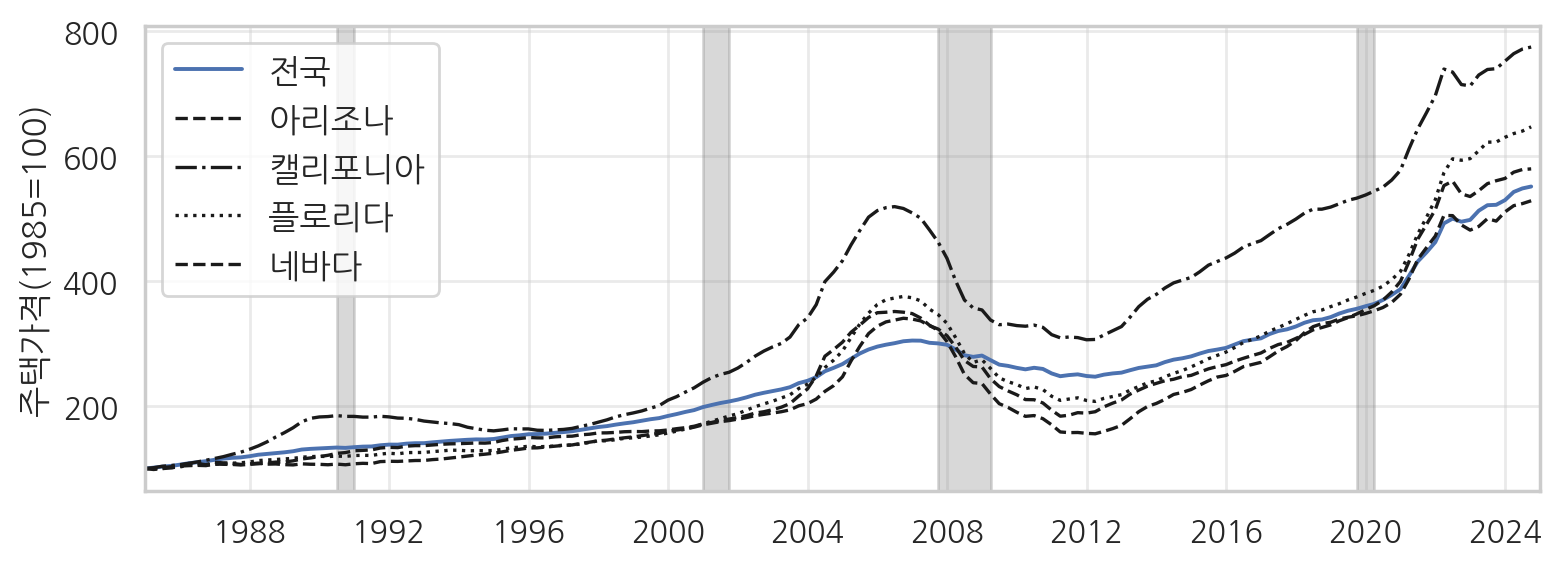

In [5]:
start_date = 1985
end_date = 2024
linewidth = 1.2

start = pd.Timestamp(f"{start_date}-01-01")
end   = pd.Timestamp(f"{end_date}-12-31")

sub = df_normalized.loc[start:end, ["USSTHPI","AZSTHPI","CASTHPI","FLSTHPI","NVSTHPI"]]

fig, ax = plt.subplots(figsize=(8,3))

ax.plot(sub.index, sub["USSTHPI"], linewidth=1.4)
ax.plot(sub.index, sub["AZSTHPI"], color="k", linestyle="--", linewidth=linewidth)
ax.plot(sub.index, sub["CASTHPI"], color="k", linestyle="-.", linewidth=linewidth)
ax.plot(sub.index, sub["FLSTHPI"], color="k", linestyle=":",  linewidth=linewidth)
ax.plot(sub.index, sub["NVSTHPI"], color="k", linestyle="--", linewidth=linewidth)

ax.legend(['전국','아리조나','캘리포니아','플로리다','네바다'], fontsize=12, loc='upper left')
ax.set_xlabel("")
ax.set_ylabel("주택가격(1985=100)", rotation=90)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(True, alpha=0.4)

# 날짜 xlim을 확실히 걸어주기
ax.set_xlim(start, end)

# Plot recessions (분기자료면 NBERq, 월자료면 NBERm)
plot_nber_recession(ax, NBERq)

save_fig('housingprice_us')
plt.show()


## 부동산 담보 대출과 모기지 DSR

In [6]:
# Balance Sheet: Total Assets: Loans Secured by Real Estate  (QBPBSTASLNREAL)
# Mortgage Debt Service Payments as a Percent of Disposable Personal Income  (MDSP)

var_list = ['QBPBSTASLNREAL', 'MDSP']
start = date(1985,1,1)
end = date(2024,12,31)

df = pdr.get_data_fred(var_list, start=start, end=end)
df.loc[:,['QBPBSTASLNREAL']] = df.loc[:,['QBPBSTASLNREAL']].div(1000)

print(df.head())
print(df.tail(3))

print(df.info())

            QBPBSTASLNREAL  MDSP
DATE                            
1985-01-01       1,126.151   NaN
1985-04-01       1,158.344   NaN
1985-07-01       1,194.533   NaN
1985-10-01       1,223.699   NaN
1986-01-01       1,241.353   NaN
            QBPBSTASLNREAL  MDSP
DATE                            
2024-04-01       5,976.855 5.701
2024-07-01       5,999.355 5.744
2024-10-01       6,003.916 5.689
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 1985-01-01 to 2024-10-01
Freq: QS-OCT
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   QBPBSTASLNREAL  160 non-null    float64
 1   MDSP            80 non-null     float64
dtypes: float64(2)
memory usage: 3.8 KB
None


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/loan_DSR.png


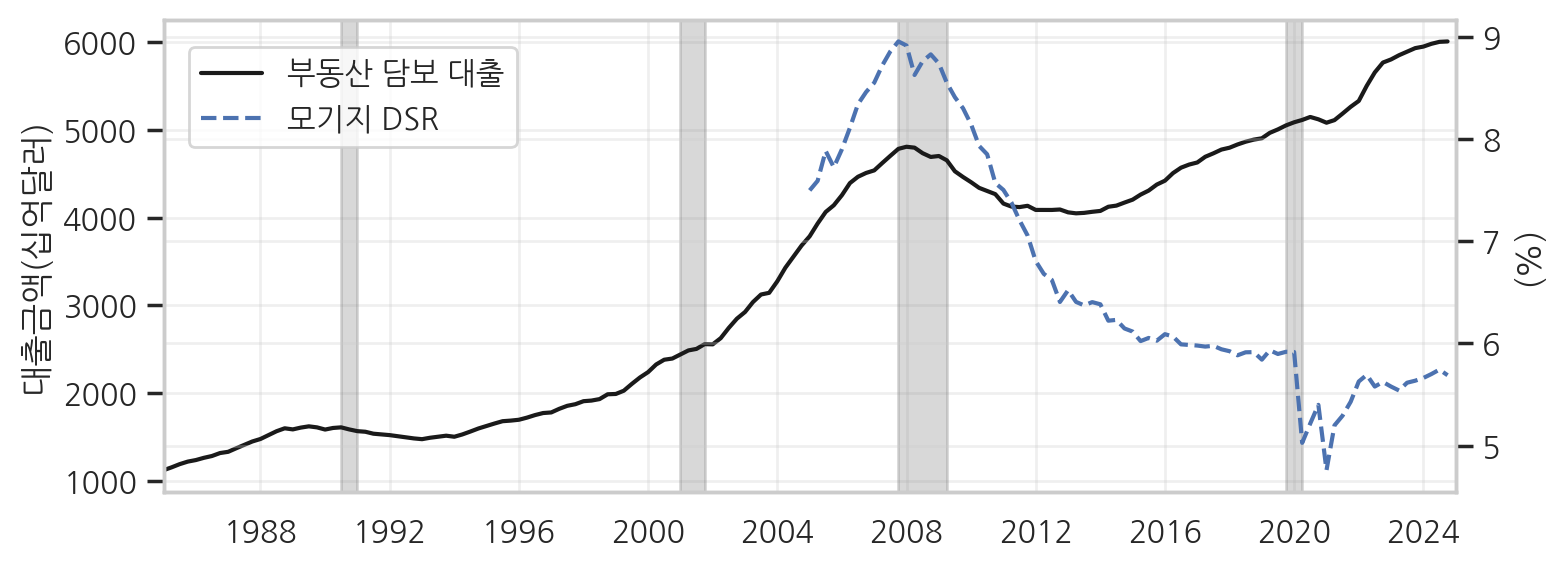

In [7]:
start_date = 1985
end_date = 2024

# Plot with second y-axis
fig, ax1 = plt.subplots(figsize=(8,3))

# First time series: Total Assets: Loans Secured by Real Estate
ax1.set_ylabel("대출금액(십억달러)")
ax1.plot(df.index, df['QBPBSTASLNREAL'], color = 'k', label='부동산 담보 대출')
ax1.tick_params(axis='y')
ax1.set_xlim([date(start_date, 1, 1), date(end_date, 12, 31)])

# Create second y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("(%)")
ax2.plot(df.index, df['MDSP'], linestyle='--',  label='모기지 DSR')
ax2.tick_params(axis='y')

# Optional: Add grid, legend, and tight layout
fig.tight_layout()
ax1.grid(True)
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.92))

plot_nber_recession(ax1, NBERq)

save_fig('loan_DSR')
plt.show()

## RP 거래

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/RP_transaction.png


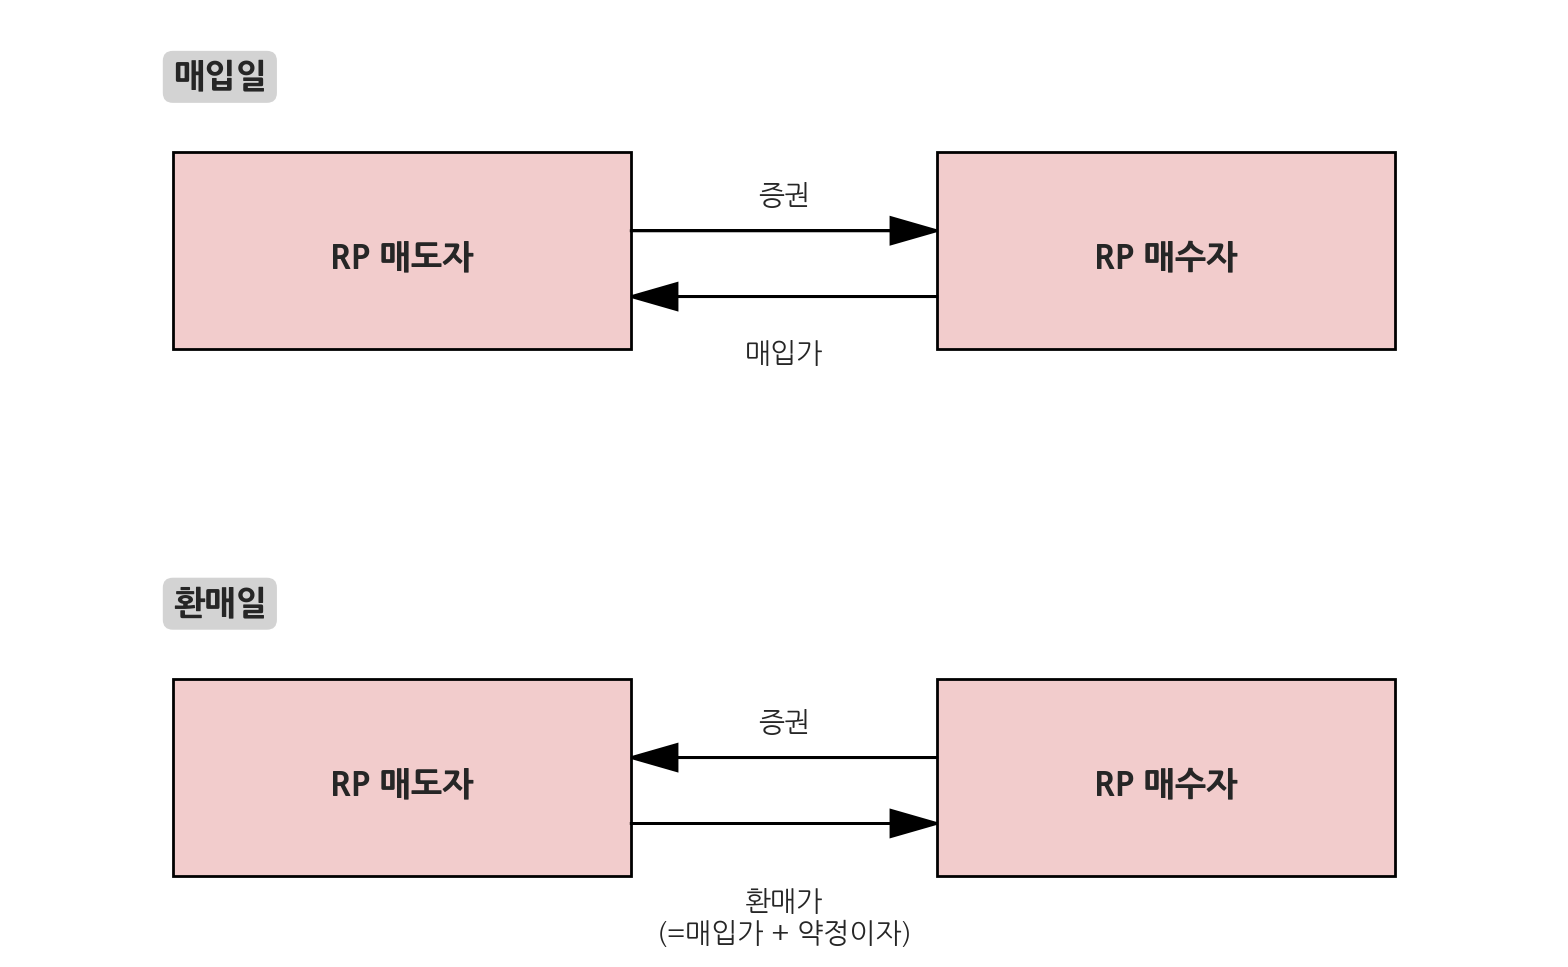

In [8]:
import matplotlib.patches as patches

def draw_rp_transaction():
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.set_xlim(0, 10)
    ax.set_ylim(3, 10)
    ax.axis('off')

    # Labels for steps
    ax.text(1, 9.5, '매입일', fontsize=12, fontweight='bold', bbox=dict(facecolor='lightgray', edgecolor='none', boxstyle='round,pad=0.3'))
    ax.text(1, 5.5, '환매일', fontsize=12, fontweight='bold', bbox=dict(facecolor='lightgray', edgecolor='none', boxstyle='round,pad=0.3'))

    # Boxes for RP 매도자 and RP 매수자
    seller_color = '#F2CCCC'  # Light red
    buyer_color = '#F2CCCC'

    ax.add_patch(patches.Rectangle((1, 7.5), 3, 1.5, facecolor=seller_color, edgecolor='black'))
    ax.text(2.5, 8.2, 'RP 매도자', fontsize=12, fontweight='bold', ha='center', va='center')

    ax.add_patch(patches.Rectangle((6, 7.5), 3, 1.5, facecolor=buyer_color, edgecolor='black'))
    ax.text(7.5, 8.2, 'RP 매수자', fontsize=12, fontweight='bold', ha='center', va='center')

    ax.add_patch(patches.Rectangle((1, 3.5), 3, 1.5, facecolor=seller_color, edgecolor='black'))
    ax.text(2.5, 4.2, 'RP 매도자', fontsize=12, fontweight='bold', ha='center', va='center')

    ax.add_patch(patches.Rectangle((6, 3.5), 3, 1.5, facecolor=buyer_color, edgecolor='black'))
    ax.text(7.5, 4.2, 'RP 매수자', fontsize=12, fontweight='bold', ha='center', va='center')

    # Arrows and Labels
    ax.arrow(4, 8.4, 1.7, 0, head_width=0.2, head_length=0.3, fc='black', ec='black')
    ax.arrow(6, 7.9, -1.7, 0, head_width=0.2, head_length=0.3, fc='black', ec='black')
    ax.text(5, 8.6, '증권', fontsize=10, ha='center')
    ax.text(5, 7.4, '매입가', fontsize=10, ha='center')

    ax.arrow(6, 4.4, -1.7, 0, head_width=0.2, head_length=0.3, fc='black', ec='black')
    ax.arrow(4, 3.9, 1.7, 0, head_width=0.2, head_length=0.3, fc='black', ec='black')
    ax.text(5, 4.6, '증권', fontsize=10, ha='center')
    ax.text(5, 3, '환매가\n(=매입가 + 약정이자)', fontsize=10, ha='center')

    plt.tight_layout()
    save_fig('RP_transaction')
    plt.show()

draw_rp_transaction()

## 미국 주택가격과 대출 연체율

In [9]:
# S&P CoreLogic Case-Shiller U.S. National Home Price Index  (CSUSHPINSA)
# Delinquency Rate on Loans Secured by Real Estate, All Commercial Banks  (DRSREACBS)
# Delinquency Rate on Credit Card Loans, All Commercial Banks  (DRCCLACBS)

#var_list = ['CSUSHPINSA','DRALACBS', 'DRSFRMACBS']
var_list = ['CSUSHPINSA','DRSREACBS', 'DRCCLACBS']
start = date(2000,1,1)
end = date(2024,12,31)

df = pdr.get_data_fred(var_list, start=start, end=end)
df = df.resample('Q').first()   # make CSUSHPINSA quarterly

print(df.head())
print(df.tail(3))

print(df.info())

            CSUSHPINSA  DRSREACBS  DRCCLACBS
DATE                                        
2000-03-31     100.000      1.800      4.430
2000-06-30     102.540      1.800      4.510
2000-09-30     105.723      1.880      4.530
2000-12-31     107.730      1.970      4.570
2001-03-31     109.215      2.060      4.810
            CSUSHPINSA  DRSREACBS  DRCCLACBS
DATE                                        
2024-06-30     320.811      1.560      3.220
2024-09-30     325.629      1.600      3.190
2024-12-31     324.023      1.640      3.090
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2000-03-31 to 2024-12-31
Freq: QE-DEC
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CSUSHPINSA  100 non-null    float64
 1   DRSREACBS   100 non-null    float64
 2   DRCCLACBS   100 non-null    float64
dtypes: float64(3)
memory usage: 3.1 KB
None


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/loan_delinquency.png


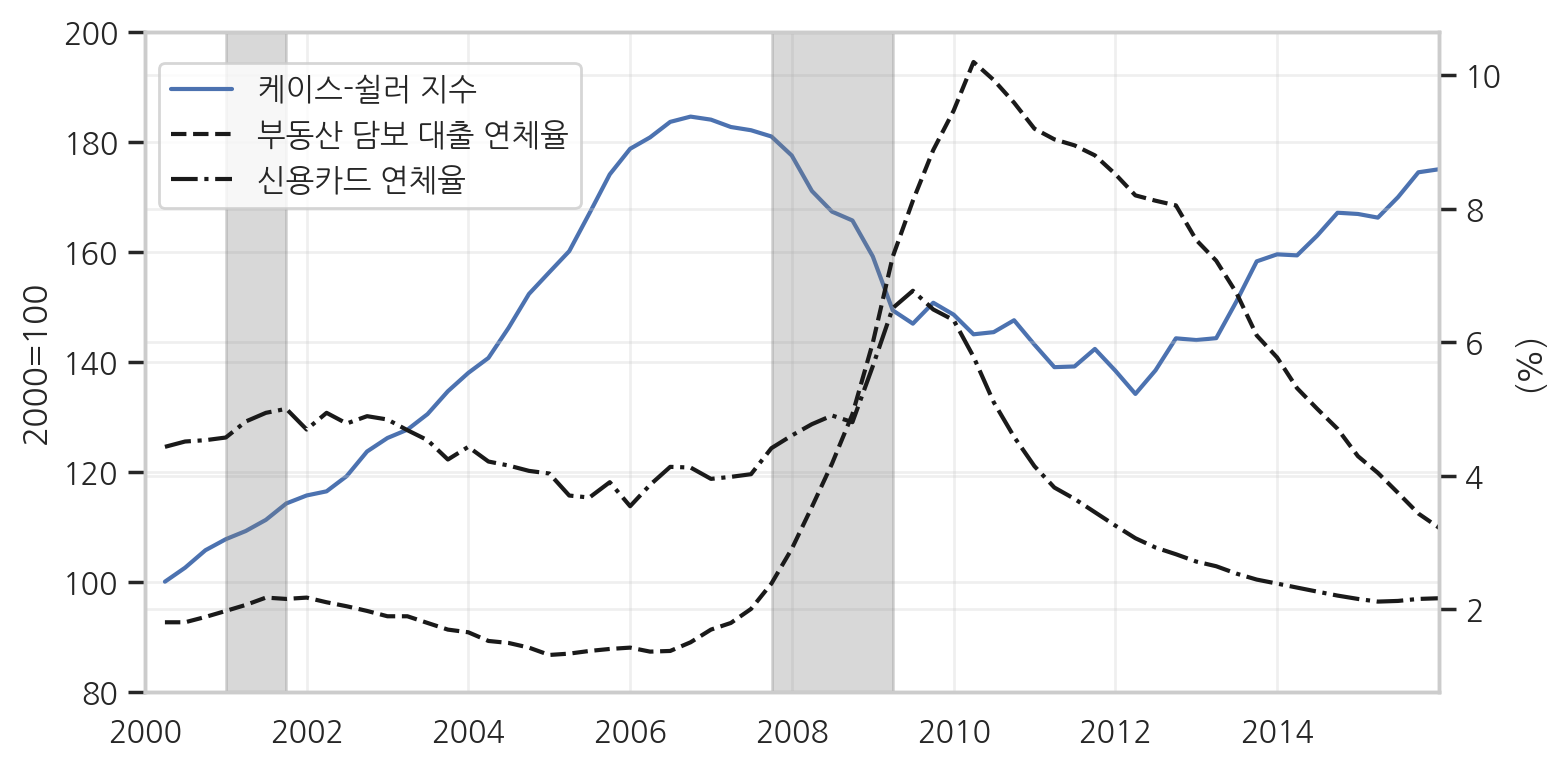

In [10]:
start_date=2000
end_date=2015

# Plot with second y-axis
fig, ax1 = plt.subplots(figsize=(8, 4))

# First time series: Case-Shiller Index
ax1.set_ylabel("2000=100")
ax1.plot(df.index, df['CSUSHPINSA'], label='케이스-쉴러 지수')
ax1.tick_params(axis='y')
ax1.set_xlim([date(start_date, 1, 1), date(end_date, 12, 31)])  # Uncomment if needed
ax1.set_ylim(80,200)

# Second y-axis: Loan Delinquency Rates
ax2 = ax1.twinx()
ax2.set_ylabel("(%)")
ax2.plot(df.index, df['DRSREACBS'], color='k', linestyle='--', label='부동산 담보 대출 연체율')
ax2.plot(df.index, df['DRCCLACBS'], color='k', linestyle='-.', label='신용카드 연체율')
ax2.tick_params(axis='y')

# Add grid, legend, and layout tweaks
fig.tight_layout()
ax1.grid(True)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(0.1, 0.92))

# Add recession shading
plot_nber_recession(ax2, NBERq)

# Save and show figure
save_fig('loan_delinquency')
plt.show()

## 미국의 실업률, 실업수당 청구건수

In [11]:
# Unemployment Rate (UNRATE)
# Continued Claims (Insured Unemployment) (CCSA)

var_list = ['UNRATE', 'CCSA']
start = date(2000,1,1)
end = date(2024,12,31)

df = pdr.get_data_fred(var_list, start=start, end=end)

df = df.resample('M').mean()
df['CCSA'] = df['CCSA'].div(1000000)

print(df.head())

            UNRATE  CCSA
DATE                    
2000-01-31   4.000 2.110
2000-02-29   4.100 2.147
2000-03-31   4.000 2.079
2000-04-30   3.800 2.015
2000-05-31   4.000 1.990


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/unemployment_claims.png


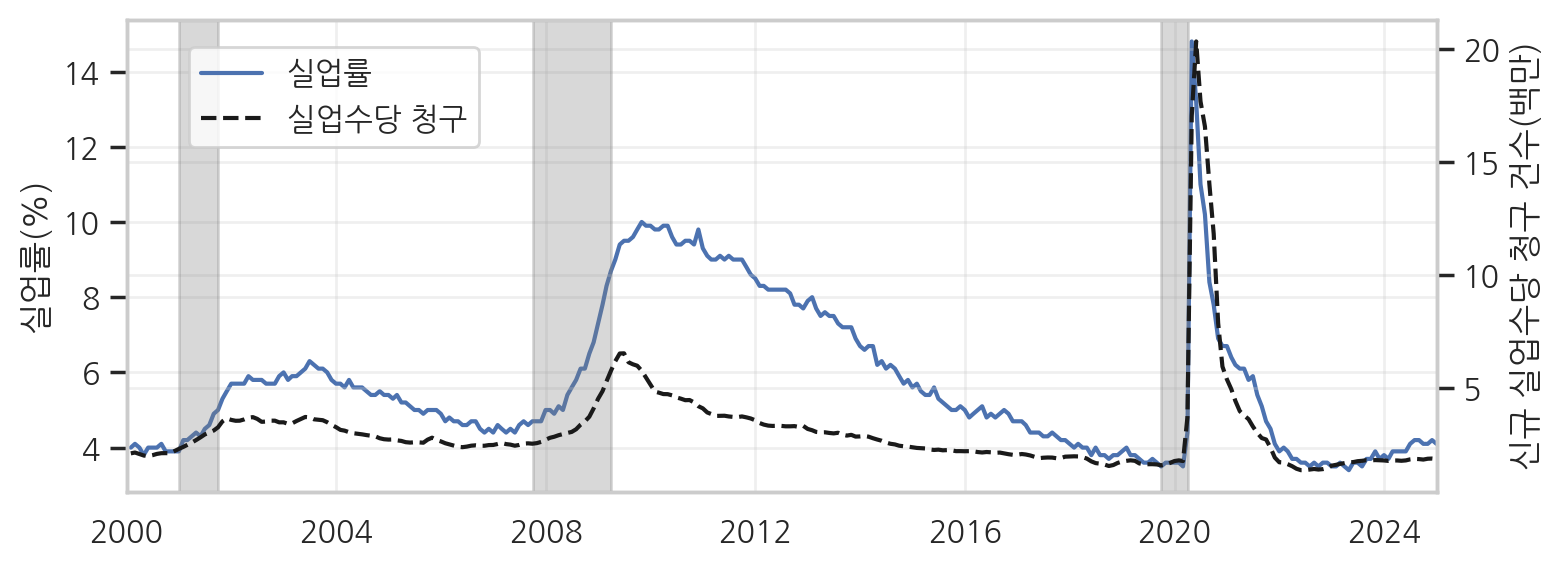

In [12]:
start_date=2000
end_date=2024

fig, ax1 = plt.subplots(figsize=(8,3))
ax1.plot(df.index,df['UNRATE'],label='실업률')
ax1.set_ylabel('실업률(%)')
ax1.set_xlim([date(start_date, 1, 1), date(end_date, 12, 31)])  # Uncomment if needed

ax2 = ax1.twinx()
ax2.plot(df.index,df['CCSA'],color='k', linestyle='--',label='실업수당 청구')
ax2.set_ylabel('신규 실업수당 청구 건수(백만)')


# Optional: Add grid, legend, and tight layout
fig.tight_layout()
ax1.grid(True)
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.92))

plot_nber_recession(ax2, NBERq)

save_fig('unemployment_claims')

## 신용 스프레드와 VIX

In [13]:
# CBOE Volatility Index: VIX  (VIXCLS)
# Moody's Seasoned Aaa Corporate Bond Yield Relative to Yield on 10-Year Treasury Constant Maturity  (AAA10Y)
# Moody's Seasoned Baa Corporate Bond Yield Relative to Yield on 10-Year Treasury Constant Maturity  (BAA10Y)

var_list = ['VIXCLS', 'AAA10Y', 'BAA10Y']
start = date(2000,1,1)
end = date(2024,12,31)

df = pdr.get_data_fred(var_list, start=start, end=end)
df = df.resample('ME').mean()

print(df.head())

            VIXCLS  AAA10Y  BAA10Y
DATE                              
2000-01-31  23.202   1.119   1.671
2000-02-29  23.596   1.157   1.768
2000-03-31  22.718   1.425   2.111
2000-04-30  27.164   1.652   2.412
2000-05-31  26.373   1.548   2.460


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/vix_spread.png


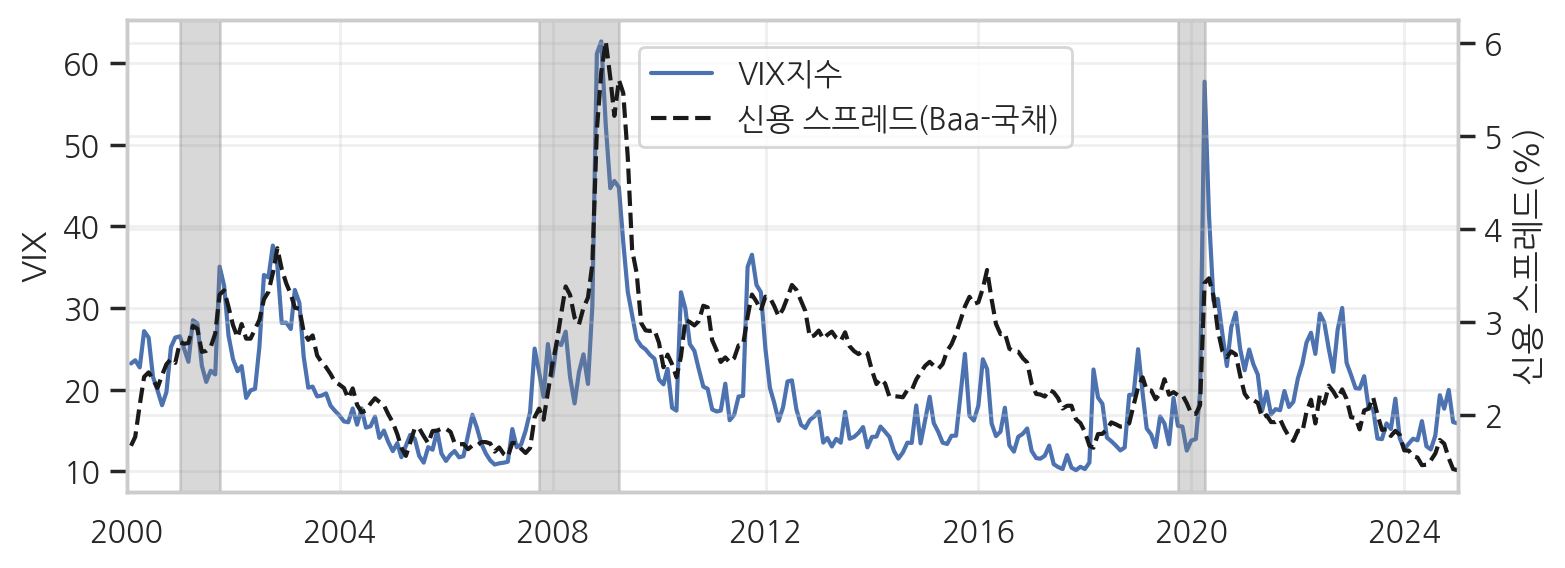

In [14]:
start_date=2000
end_date=2024

# Plot with second y-axis
fig, ax1 = plt.subplots(figsize=(8, 3))

# First time series: Case-Shiller Index
ax1.set_ylabel("VIX")
ax1.plot(df.index, df['VIXCLS'], label='VIX지수')
ax1.tick_params(axis='y')
ax1.set_xlim([date(start_date, 1, 1), date(end_date, 12, 31)])  # Uncomment if needed

# Second y-axis: Loan Delinquency Rates
ax2 = ax1.twinx()
ax2.set_ylabel("신용 스프레드(%)")
#ax2.plot(df.index, df['AAA10Y'], color='k', linestyle='-.', label='부동산 담보 대출 연체율')
ax2.plot(df.index, df['BAA10Y'], color='k', linestyle='--', label='신용 스프레드(Baa-국채)')
ax2.tick_params(axis='y')

# Add grid, legend, and layout tweaks
fig.tight_layout()
ax1.grid(True)


# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(0.4, 0.92))

# Add recession shading
plot_nber_recession(ax2, NBERq)

# Save and show figure
save_fig('vix_spread')
plt.show()

## 미 연준의 연방기금금리와 재할인율

In [15]:
# Federal Funds Target Rate (DISCONTINUED)  (DFEDTAR)
# Discount Window Primary Credit Rate  (DPCREDIT)
# Federal Funds Target Range - Upper Limit  (DFEDTARU)
# Federal Funds Target Range - Lower Limit  (DFEDTARL)

var_list = ['DFEDTAR', 'DPCREDIT','DFEDTARU','DFEDTARL']
start = date(2003,9,1)
end = date(2024,12,31)

df = pdr.get_data_fred(var_list, start=start, end=end)
#df = df.resample('ME').mean()

print(df.head())

            DFEDTAR  DPCREDIT  DFEDTARU  DFEDTARL
DATE                                             
2003-09-01    1.000     2.000       NaN       NaN
2003-09-02    1.000     2.000       NaN       NaN
2003-09-03    1.000     2.000       NaN       NaN
2003-09-04    1.000     2.000       NaN       NaN
2003-09-05    1.000     2.000       NaN       NaN


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/ffr_discount.png


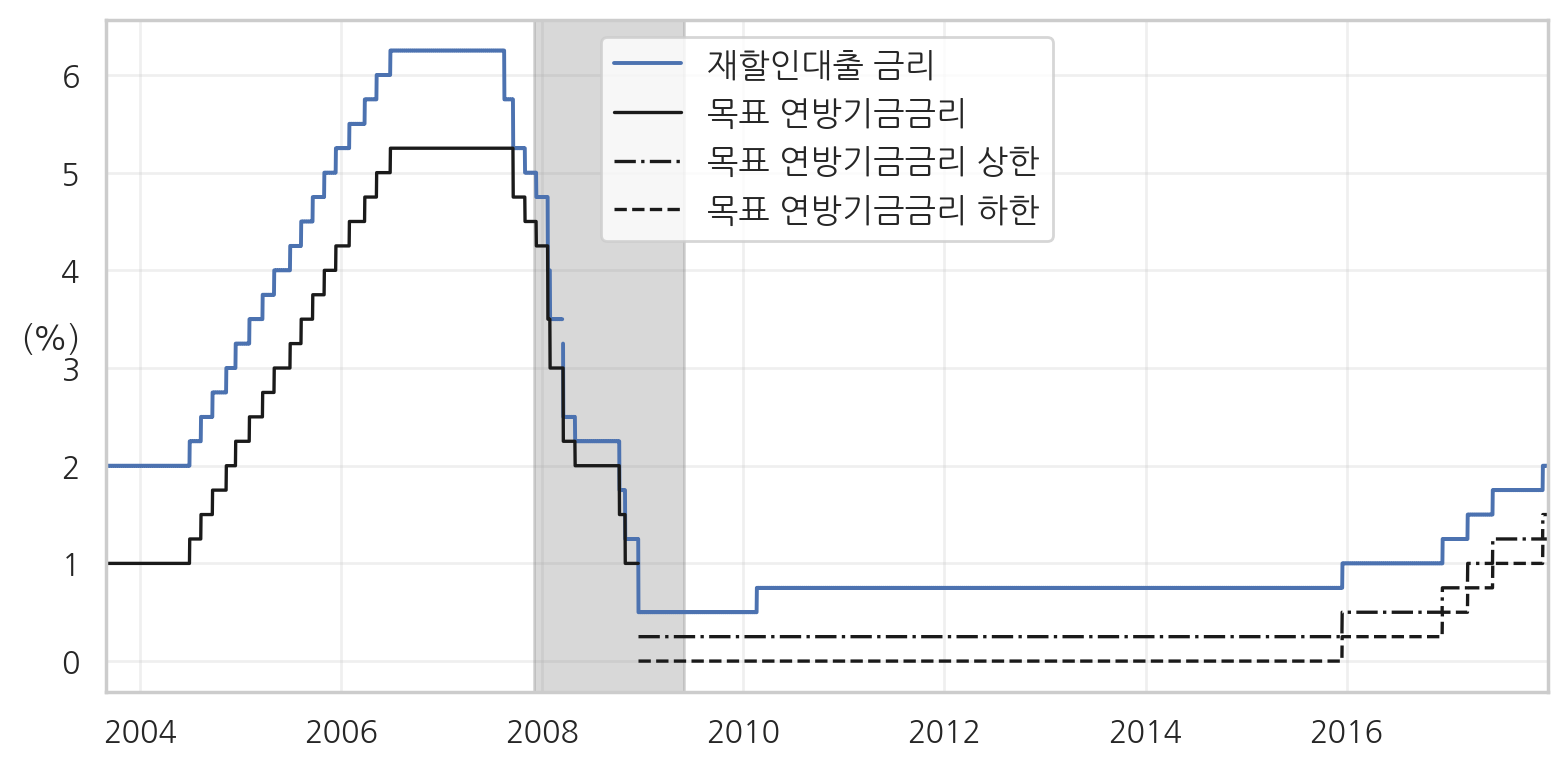

In [16]:
start_date = 2003
end_date = 2017

linewidth = 1.2
fig, ax = plt.subplots(figsize=(8,4))
df.loc[str(start_date):str(end_date),'DPCREDIT'].plot(figsize=(8,4), linewidth=1.4, ax=ax)
df.loc[str(start_date):str(end_date),'DFEDTAR'].plot(color='k', linewidth=linewidth, ax=ax)
df.loc[str(start_date):str(end_date),'DFEDTARU'].plot(color='k', linestyle='-.', linewidth=linewidth, ax=ax)
df.loc[str(start_date):str(end_date),'DFEDTARL'].plot(color='k', linestyle='--', linewidth=linewidth, ax=ax)

ax.legend(labels=['재할인대출 금리','목표 연방기금금리','목표 연방기금금리 상한','목표 연방기금금리 하한'], fontsize=12, loc='upper center')
ax.set_xlabel('')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('(%)', rotation=0)
ax.grid(True)

# Plot recessions
plot_nber_recession(ax, NBERm)

save_fig('ffr_discount')
plt.show()

## 미 연준 대차대조표 자산, 부채


### 자산: 장단기 국채 분리해서 표시한 경우

In [17]:
# Assets: Total Assets: Total Assets (Less Eliminations from Consolidation): Wednesday Level (WALCL)
# Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level (TREAST)
# Assets: Securities Held Outright: U.S. Treasury Securities: Notes and Bonds, Nominal: Wednesday Level (WSHONBNL)
# Assets: Securities Held Outright: Mortgage-Backed Securities: Wednesday Level  (WSHOMCB)
# Assets: Securities Held Outright: Federal Agency Debt Securities: Wednesday Level (WSHOFADSL)

var_list = ['WALCL','TREAST', 'WSHONBNL','WSHOMCB', 'WSHOFADSL']
start = date(2002,1,1)
end = date(2019,12,31)

df_asset = pdr.get_data_fred(var_list, start=start, end=end)
df_asset['단기 국채'] = df_asset['TREAST'] - df_asset['WSHONBNL']
df_asset['기타'] = df_asset['WALCL'] - df_asset['TREAST'] - df_asset['WSHOMCB'] - df_asset['WSHOFADSL']

df_asset = df_asset.drop(['WALCL','TREAST'], axis=1)
df_asset = df_asset.div(1000000)

df_asset.columns = ['장기 국채','MBS','기관 MBS','단기 국채','기타']

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/Fed_asset_2019_BillNote.png


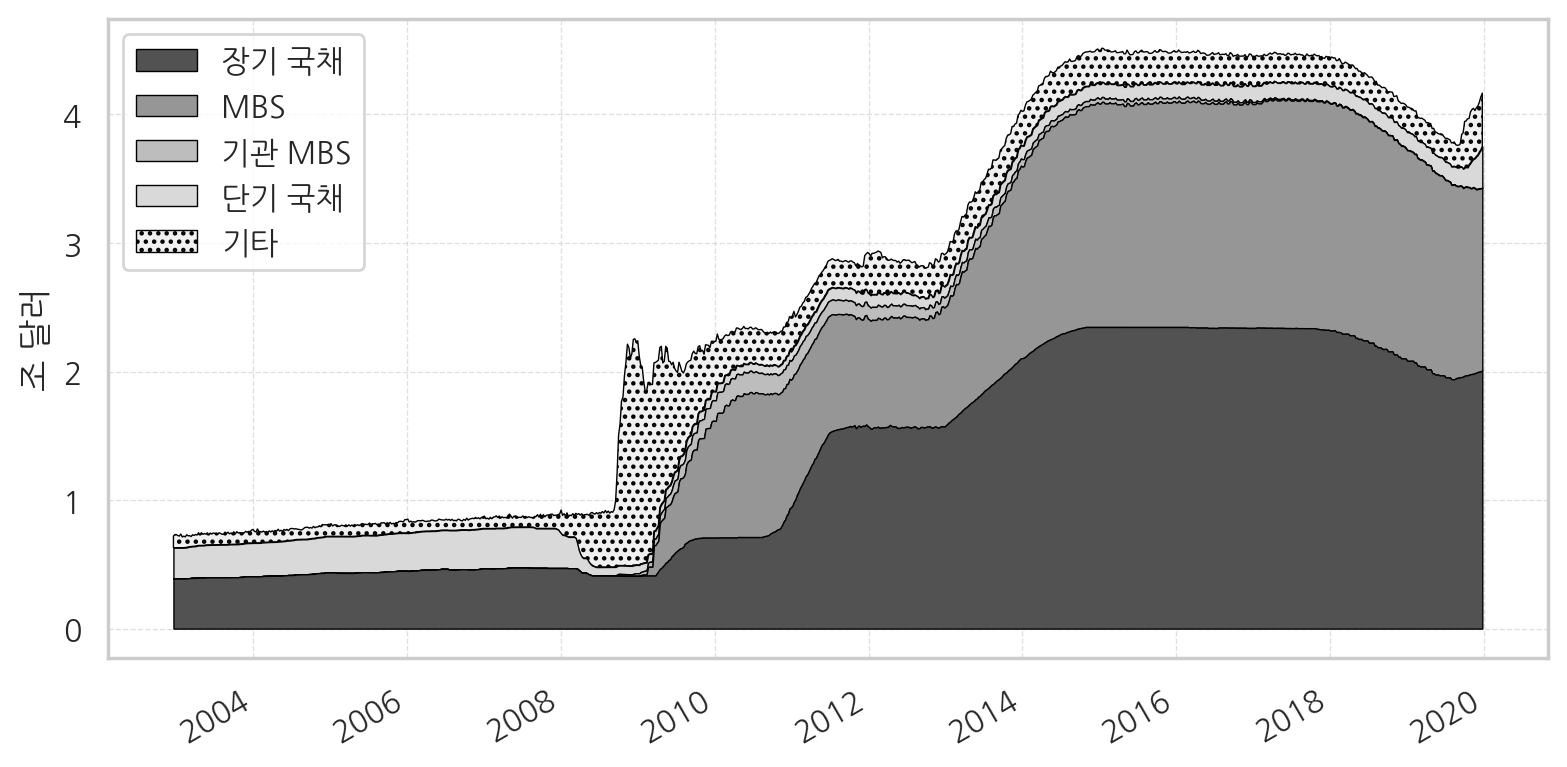

In [18]:
# Example stacked data
x = df_asset.index
y = df_asset.T.values  # shape: (n_layers, n_dates)
y_cum = np.cumsum(y, axis=0)

# Grayscale colors
bw_colors = ['#525252', '#969696', '#bdbdbd', '#d9d9d9', '#f0f0f0']
hatches = [None, None, None, None,'....' ]  # Add pattern to last layer only

# Plot
fig, ax = plt.subplots(figsize=(8,4))

for i in reversed(range(len(bw_colors))):
    y1 = y_cum[i - 1] if i > 0 else np.zeros_like(x, dtype=float)
    y2 = y_cum[i]
    ax.fill_between(x, y1, y2,
                    facecolor=bw_colors[i],
                    edgecolor='black',
                    hatch=hatches[i],
                    linewidth=0.5,
                    label=df_asset.columns[i])

# Labels and formatting
ax.set_ylabel("조 달러")
ax.legend(loc='upper left')
# Reverse the legend order
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left')

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
fig.autofmt_xdate()
plt.tight_layout()

save_fig('Fed_asset_2019_BillNote')
plt.show()

### 자산: 장단기 국채 분리 안 한 경우

In [19]:
# Assets: Total Assets: Total Assets (Less Eliminations from Consolidation): Wednesday Level (WALCL)
# Assets: Securities Held Outright: U.S. Treasury Securities: All: Wednesday Level (TREAST)
# Assets: Securities Held Outright: Mortgage-Backed Securities: Wednesday Level  (WSHOMCB)
# Assets: Securities Held Outright: Federal Agency Debt Securities: Wednesday Level (WSHOFADSL)

var_list = ['WALCL','TREAST', 'WSHOMCB', 'WSHOFADSL']
start = date(2002,1,1)
end = date(2019,12,31)

df_asset = pdr.get_data_fred(var_list, start=start, end=end)
df_asset['기타'] = df_asset['WALCL'] - df_asset['TREAST'] - df_asset['WSHOMCB'] - df_asset['WSHOFADSL']

df_asset = df_asset.drop('WALCL', axis=1)
df_asset = df_asset.div(1000000)

df_asset.columns = ['국채','MBS','기관 MBS','기타']

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/Fed_asset_2019.png


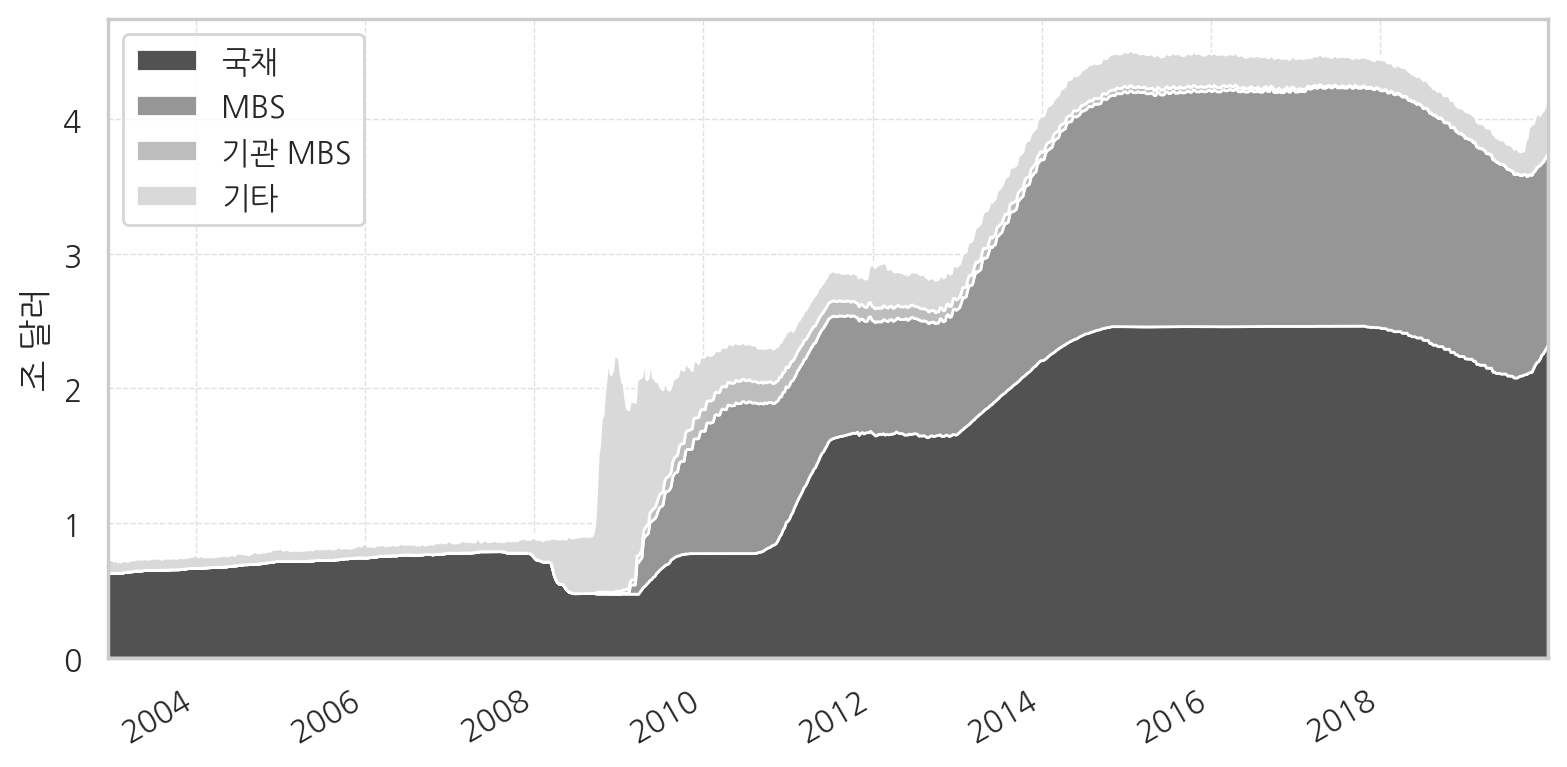

In [20]:
# Define grayscale colors (light to dark)
bw_colors = ['#525252', '#969696','#bdbdbd', '#d9d9d9' ]  # light gray → dark gray

# Create plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.stackplot(df_asset.index,
             df_asset.T.values,
             labels=df_asset.columns,
             colors=bw_colors)

# Styling
#ax.set_title("연준 자산 구성 추이 (2000–2024)", fontsize=15, weight='bold')
ax.set_ylabel("조 달러")
ax.legend(loc='upper left')
ax.set_xlim(df_asset.index.min(), df_asset.index.max())
#ax.set_ylim(0, df_asset.sum(axis=1).max() * 1.1)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)


# Improve x-axis formatting
fig.autofmt_xdate()

plt.tight_layout()
save_fig('Fed_asset_2019')
plt.show()

### 부채

In [21]:
# Liabilities and Capital: Liabilities: Total Liabilities (Less Eliminations from Consolidation): Wednesday Level (WLTLECL)
# Liabilities and Capital: Other Factors Draining Reserve Balances: Currency in Circulation: Week Average (WCURCIR)
# Liabilities and Capital: Other Factors Draining Reserve Balances: Reserve Balances with Federal Reserve Banks: Week Average (WRESBAL)

var_list = ['WLTLECL','WCURCIR', 'WRESBAL']
start = date(2002,1,1)
end = date(2019,12,31)

df_liab = pdr.get_data_fred(var_list, start=start, end=end)

df_liab['기타'] = (df_liab['WLTLECL'] - df_liab['WCURCIR'] - df_liab['WRESBAL'])

df_liab = df_liab.drop('WLTLECL', axis=1)
df_liab = df_liab.div(1000)

df_liab.columns = ['현금통화','지불준비금','기타']

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/Fed_liab_2019.png


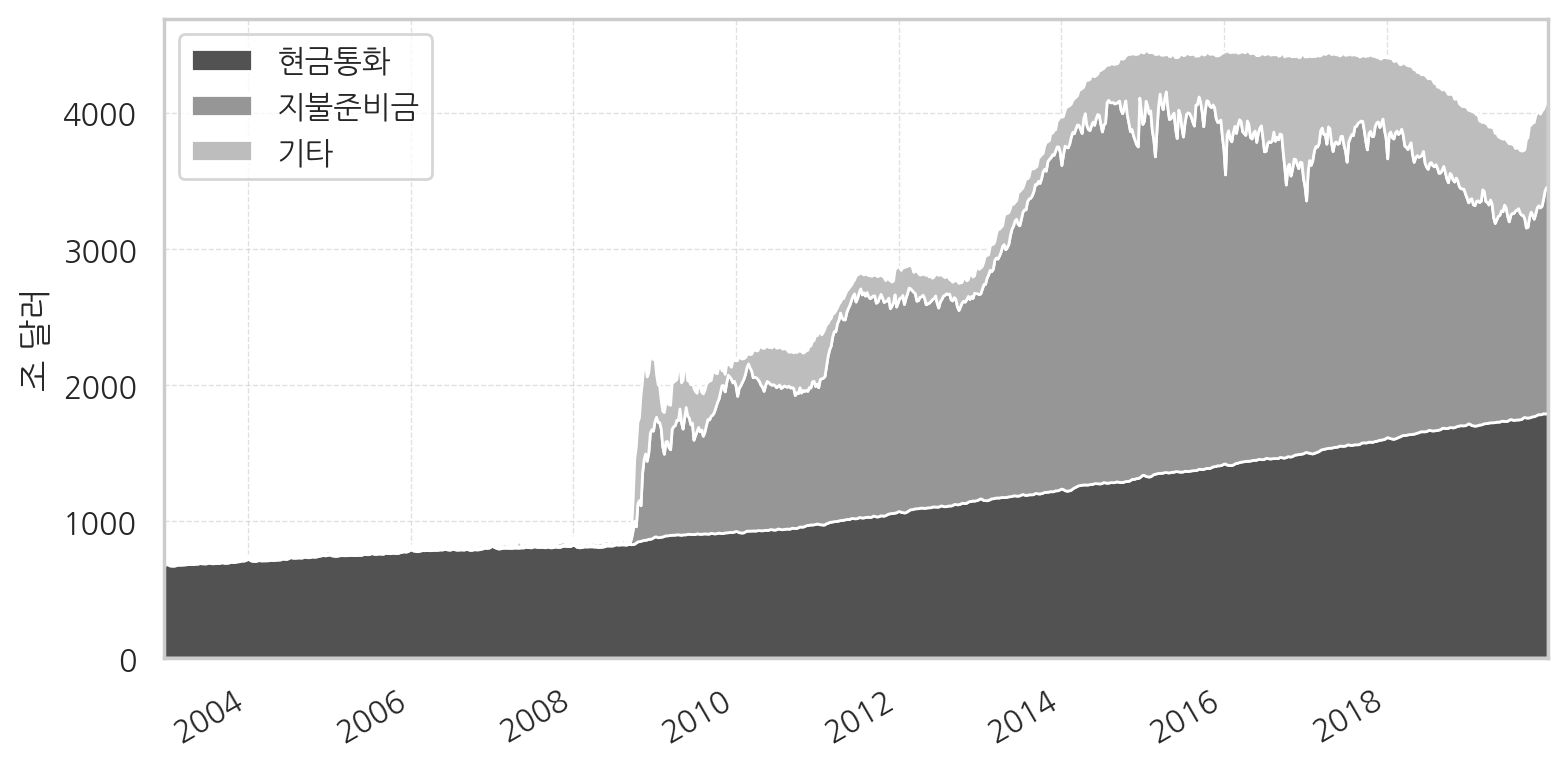

In [22]:
# Define grayscale colors (light to dark)
bw_colors = ['#525252', '#969696','#bdbdbd']  # light gray → dark gray

# Create plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.stackplot(df_liab.index,
             df_liab.T.values,
             labels=df_liab.columns,
             colors=bw_colors)

# Styling
ax.set_ylabel("조 달러")
ax.legend(loc='upper left')
ax.set_xlim(df_liab.index.min(), df_liab.index.max())
#ax.set_ylim(0, df_liab.sum(axis=1).max() * 1.1)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Improve x-axis formatting
fig.autofmt_xdate()

plt.tight_layout()
save_fig('Fed_liab_2019')
plt.show()

## 유럽 국가들 10년 만기 국채 수익률 추이

In [23]:
# Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for Greece  (IRLTLT01GRM156N)
# Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for Spain  (IRLTLT01ESM156N)
# Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for Portugal  (IRLTLT01PTM156N)
# Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for Italy  (IRLTLT01ITM156N)
# Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for Ireland  (IRLTLT01IEM156N)
# Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for Germany  (IRLTLT01DEM156N)

var_list = [ 'IRLTLT01GRM156N','IRLTLT01ESM156N','IRLTLT01PTM156N','IRLTLT01ITM156N','IRLTLT01IEM156N','IRLTLT01DEM156N']
start = date(1997,7,1)
end = date(2024,12,31)

df = pdr.get_data_fred(var_list, start=start, end=end)
df.columns = ['그리스','스페인','포르투갈','이태리','아일랜드','독일']

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/euro_10y_yield.png


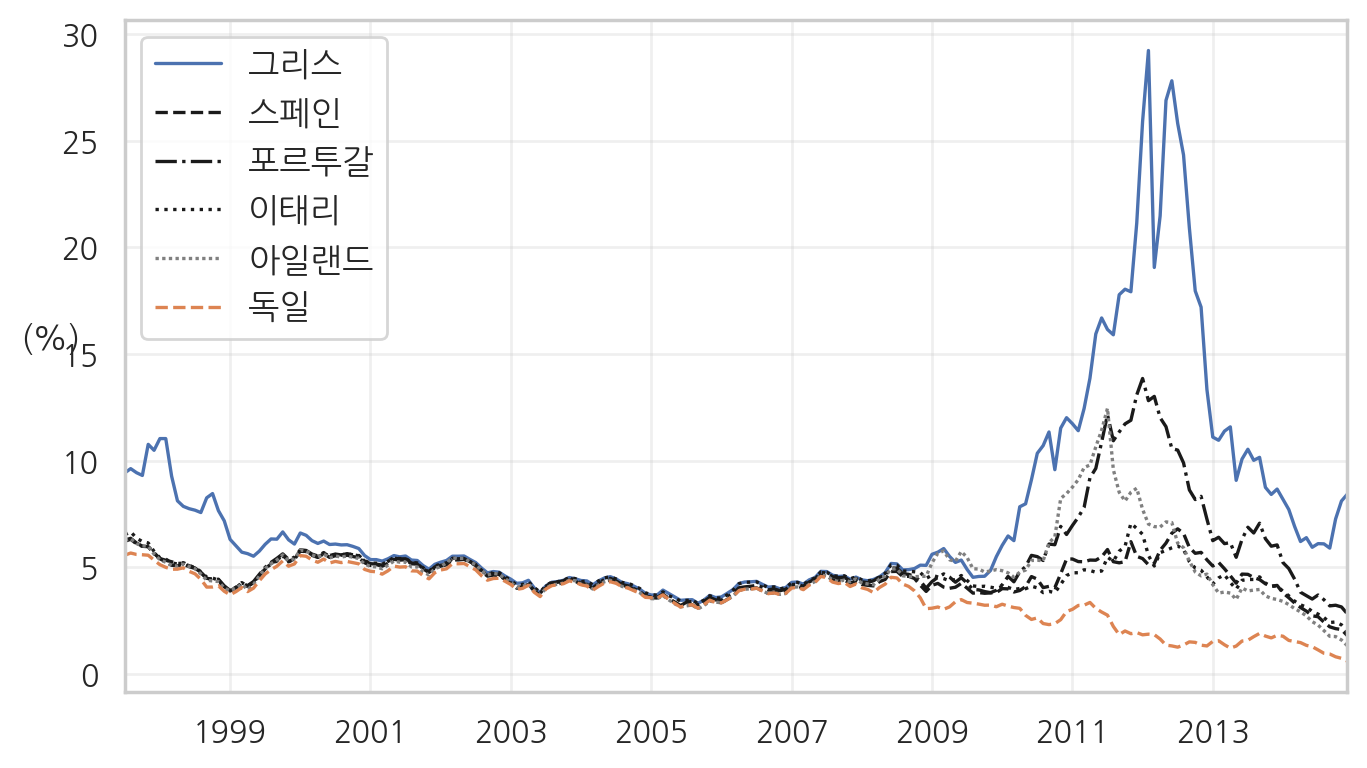

In [24]:
start_date = 1997
end_date = 2014

linewidth = 1.2
fig, ax = plt.subplots(figsize=(7,4))
df.loc[str(start_date):str(end_date),'그리스'].plot(figsize=(7,4), linewidth=linewidth, ax=ax)
df.loc[str(start_date):str(end_date),'스페인'].plot(color='k', linestyle='--', linewidth=linewidth, ax=ax)
df.loc[str(start_date):str(end_date),'포르투갈'].plot(color='k', linestyle='-.', linewidth=linewidth, ax=ax)
df.loc[str(start_date):str(end_date),'이태리'].plot(color='k', linestyle=':', linewidth=linewidth, ax=ax)
df.loc[str(start_date):str(end_date),'아일랜드'].plot(color='grey', linestyle=(0, (1, 1)), linewidth=linewidth, ax=ax)
df.loc[str(start_date):str(end_date),'독일'].plot( linestyle='--', linewidth=linewidth, ax=ax)

ax.legend(labels=['그리스','스페인','포르투갈','이태리','아일랜드','독일'], fontsize=12, loc='upper left')
ax.set_xlabel('')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('(%)', rotation=0)
ax.grid(True)

save_fig('euro_10y_yield')
plt.show()

## 유럽 대출 스프레드와 부실대출 비중

In [25]:
# Bank Lending Deposit Spread for Euro Area (DISCONTINUED)  (DDEI02EZA156NWDB)
# Bank Non-Performing Loans to Gross Loans for Euro Area (DISCONTINUED)  (DDSI02EZA156NWDB)

var_list = [ 'DDEI02EZA156NWDB','DDSI02EZA156NWDB']
start = date(1998,7,1)
end = date(2015,12,31)

df = pdr.get_data_fred(var_list, start=start, end=end)
df.columns = ['대출 스프레드','부실대출 비중']

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/euro_loan_related.png


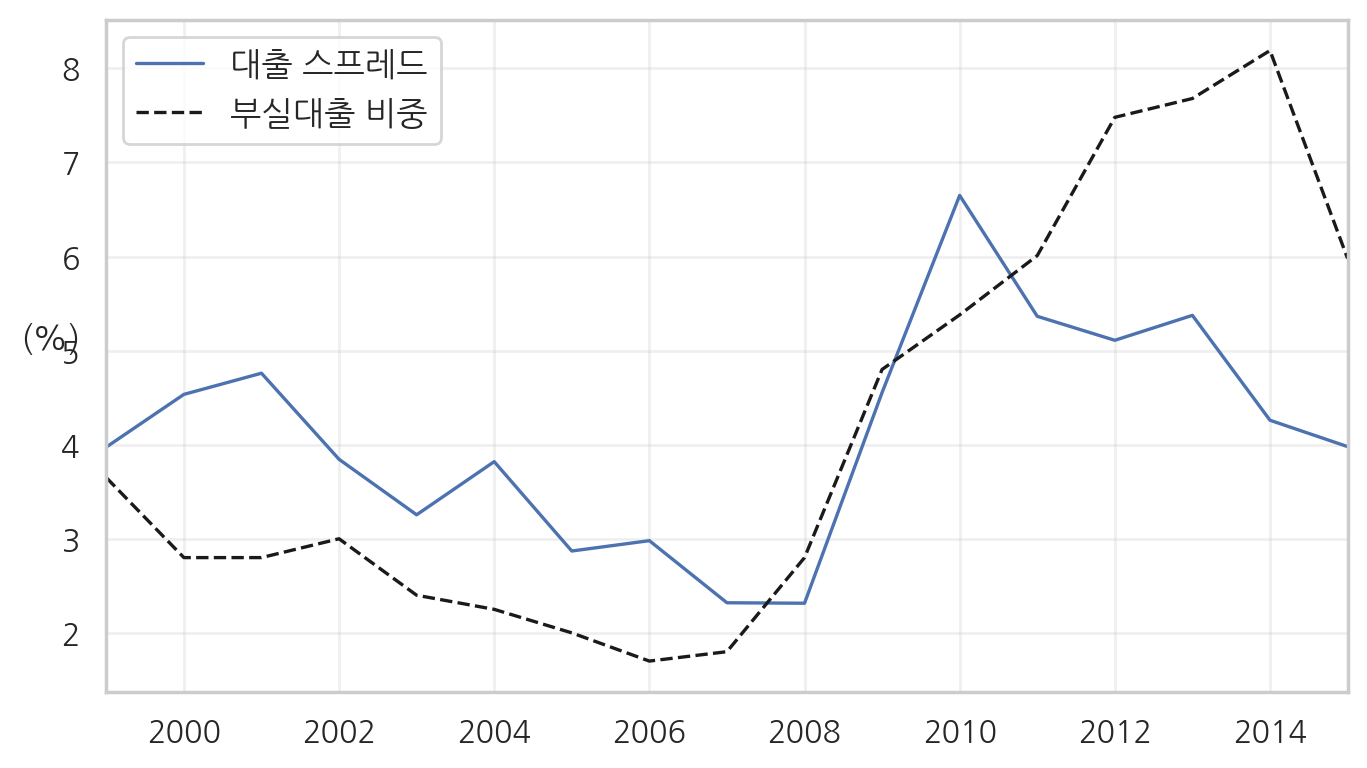

In [26]:
start_date = 1998
end_date = 2015

linewidth = 1.2
fig, ax = plt.subplots(figsize=(7,4))
df.loc[str(start_date):str(end_date),'대출 스프레드'].plot(figsize=(7,4), linewidth=linewidth, ax=ax)
df.loc[str(start_date):str(end_date),'부실대출 비중'].plot(color='k', linestyle='--', linewidth=linewidth, ax=ax)

ax.legend(labels=['대출 스프레드','부실대출 비중'], fontsize=12, loc='upper left')
ax.set_xlabel('')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('(%)', rotation=0)
ax.grid(True)

save_fig('euro_loan_related')
plt.show()

## 미국와 유럽 국가들의 GDP 추이

In [27]:
# Real Gross Domestic Product  (GDPC1)
# Real Gross Domestic Product (Euro/ECU Series) for Euro Area (19 Countries)  (CLVMEURSCAB1GQEA19)
# Real Gross Domestic Product for Germany (CLVMNACSCAB1GQDE)
# Real Gross Domestic Product for France (CLVMNACSCAB1GQFR)
# Real Gross Domestic Product for Great Britain (NGDPRSAXDCGBQ)
# Real Gross Domestic Product for Greece (CLVMNACSCAB1GQEL)
# Real Gross Domestic Product for Spain (CLVMNACSCAB1GQES)
# Real Gross Domestic Product for Portugal (CLVMNACSCAB1GQPT)
# Real Gross Domestic Product for Italy (CLVMNACSCAB1GQIT)
# Real Gross Domestic Product for Ireland (CLVMNACSAB1GQIE)

var_list = [ 'GDPC1','CLVMEURSCAB1GQEA19','CLVMNACSCAB1GQDE','CLVMNACSCAB1GQFR','NGDPRSAXDCGBQ','CLVMNACSCAB1GQEL','CLVMNACSCAB1GQES','CLVMNACSCAB1GQPT','CLVMNACSCAB1GQIT','CLVMNACSAB1GQIE']
start = date(2005,1,1)
end = date(2024,12,31)

df = pdr.get_data_fred(var_list, start=start, end=end)
df.columns = ['미국','유로 지역(19개국)','독일','프랑스','영국','그리스','스페인','포르투갈','이태리','아일랜드']

In [28]:
start_date = 2008
end_date = 2015

df = df.loc[str(start_date):str(end_date),:]
df_normalize = 100*df.div(df.iloc[0,:])

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/gdp_us_euro1.png


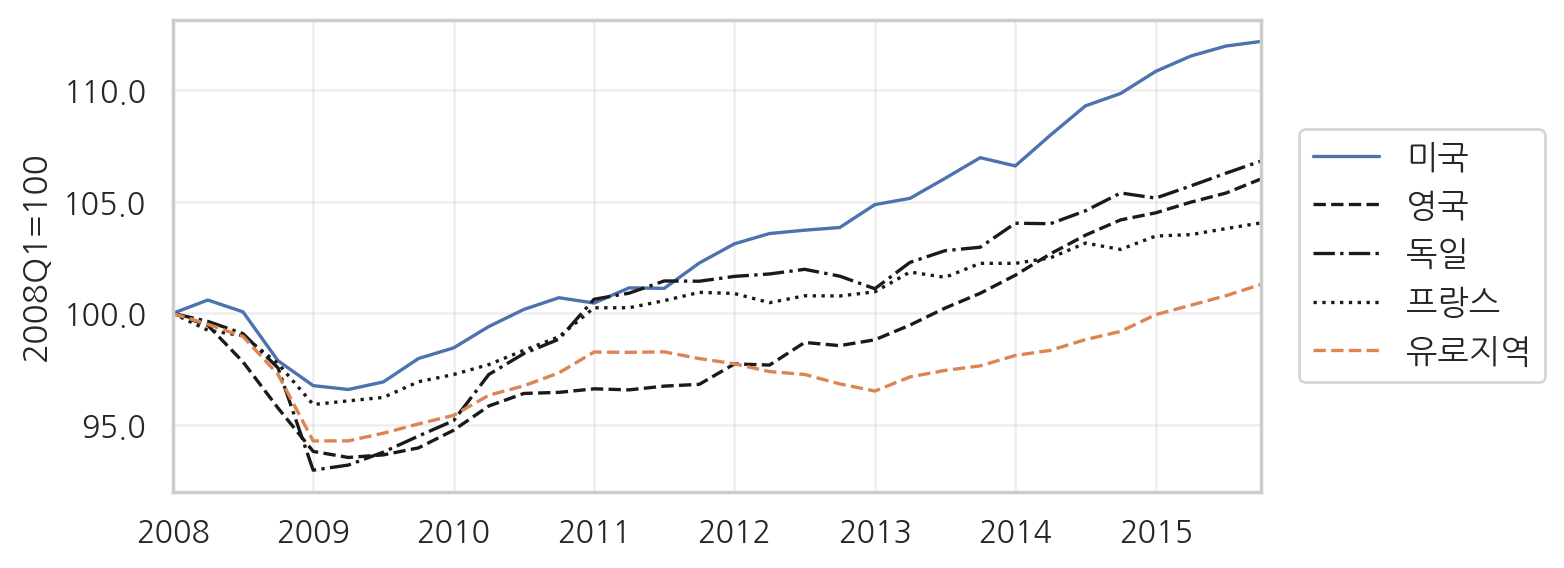

In [29]:
linewidth = 1.2
fig, ax = plt.subplots(figsize=(8,3))
df_normalize.loc[:,'미국'].plot(figsize=(8,3), linewidth=linewidth, ax=ax)
df_normalize.loc[:,'영국'].plot(color='k', linestyle='--', linewidth=linewidth, ax=ax)
df_normalize.loc[:,'독일'].plot(color='k', linestyle='-.', linewidth=linewidth, ax=ax)
df_normalize.loc[:,'프랑스'].plot(color='k', linestyle=':', linewidth=linewidth, ax=ax)
df_normalize.loc[:,'유로 지역(19개국)'].plot(linestyle='--', linewidth=linewidth, ax=ax)

ax.legend(
    labels = ['미국','영국','독일','프랑스','유로지역'],
    fontsize=12,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),  # x=1.02 (slightly outside), y=0.5 (centered vertically)
    frameon=True
)

ax.set_xlabel('')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax.set_ylabel('2008Q1=100', rotation=90)
ax.grid(True)

save_fig('gdp_us_euro1')
plt.show()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/gdp_us_euro2.png


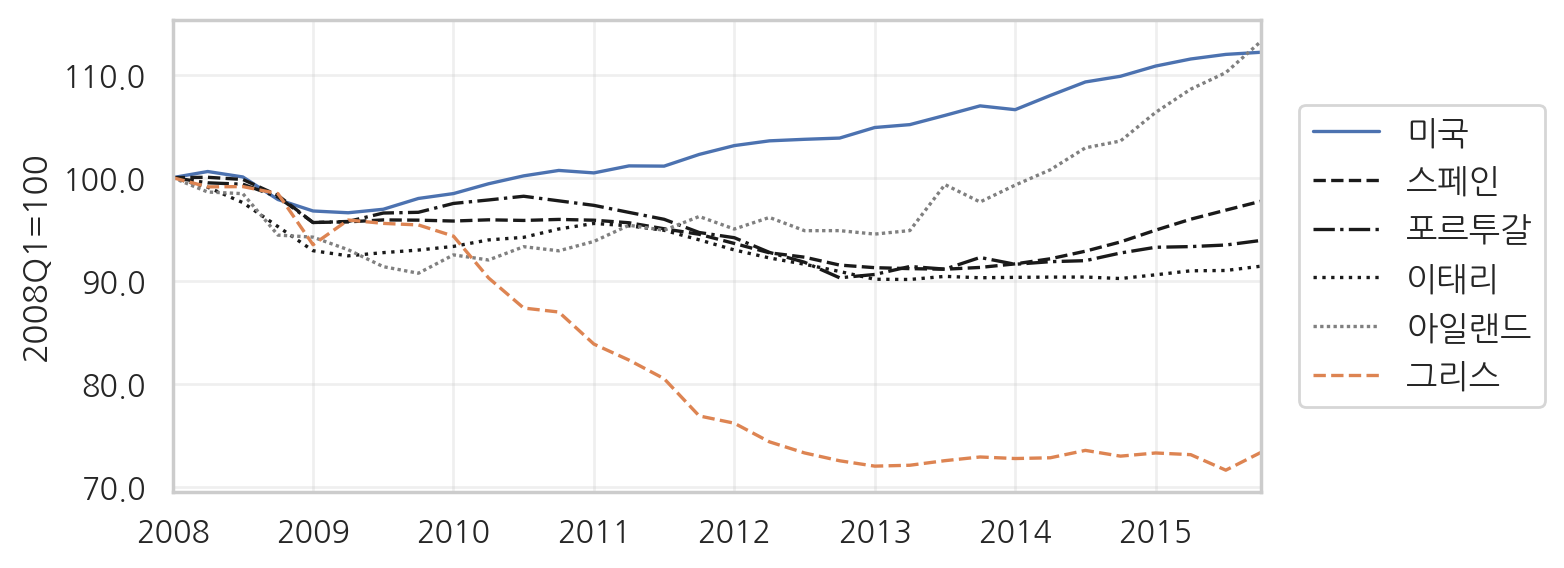

In [30]:
linewidth = 1.2
fig, ax = plt.subplots(figsize=(8,3))
df_normalize.loc[:,'미국'].plot(figsize=(8,3), linewidth=linewidth, ax=ax)
df_normalize.loc[:,'스페인'].plot(color='k', linestyle='--', linewidth=linewidth, ax=ax)
df_normalize.loc[:,'포르투갈'].plot(color='k', linestyle='-.', linewidth=linewidth, ax=ax)
df_normalize.loc[:,'이태리'].plot(color='k', linestyle=':', linewidth=linewidth, ax=ax)
df_normalize.loc[:,'아일랜드'].plot(color='grey', linestyle=(0, (1, 1)), linewidth=linewidth, ax=ax)
df_normalize.loc[:,'그리스'].plot(linestyle='--', linewidth=linewidth, ax=ax)

ax.legend(
    fontsize=12,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),  # x=1.02 (slightly outside), y=0.5 (centered vertically)
    frameon=True
)

ax.set_xlabel('')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax.set_ylabel('2008Q1=100', rotation=90)
ax.grid(True)

save_fig('gdp_us_euro2')
plt.show()

## 연준과 ECB의 대응 규모 비교

In [31]:
!pip -q install ecbdata
from ecbdata import ecbdata

In [32]:
# ECB 데이터 가져오기
df_ecb = ecbdata.get_series('ILM.W.U2.C.T000000.Z5.Z01',
                        start='2001-01')

df_ecb.TIME_PERIOD = pd.to_datetime(df_ecb.TIME_PERIOD  + '-1', format='%G-W%V-%u')  # ISO week
df_ecb = df_ecb.set_index('TIME_PERIOD')
df_ecb = df_ecb[['OBS_VALUE']]

df_ecb.index.names = ['DATE']
df_ecb.columns = ['ECB']

df_ecb = df_ecb.resample('ME').mean()

In [33]:
# FRED 데이터 가져오기
var_list = ['WALCL']
start = date(2001,1,1)
end = date(2019,12,31)

df_fed = pdr.get_data_fred(var_list, start=start, end=end)

df_fed.columns = ['연준']

df_fed = df_fed.resample('ME').mean()

In [34]:
# ECB, FRED 데이터 합치기
start_date = 2006
end_date = 2014

df_cb = pd.concat([df_fed, df_ecb], axis=1)

df_cb = df_cb.loc[str(start_date):str(end_date),:]

df_cb_normalize = df_cb.div(df_cb.iloc[0])

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/Fed_ECB_response.png


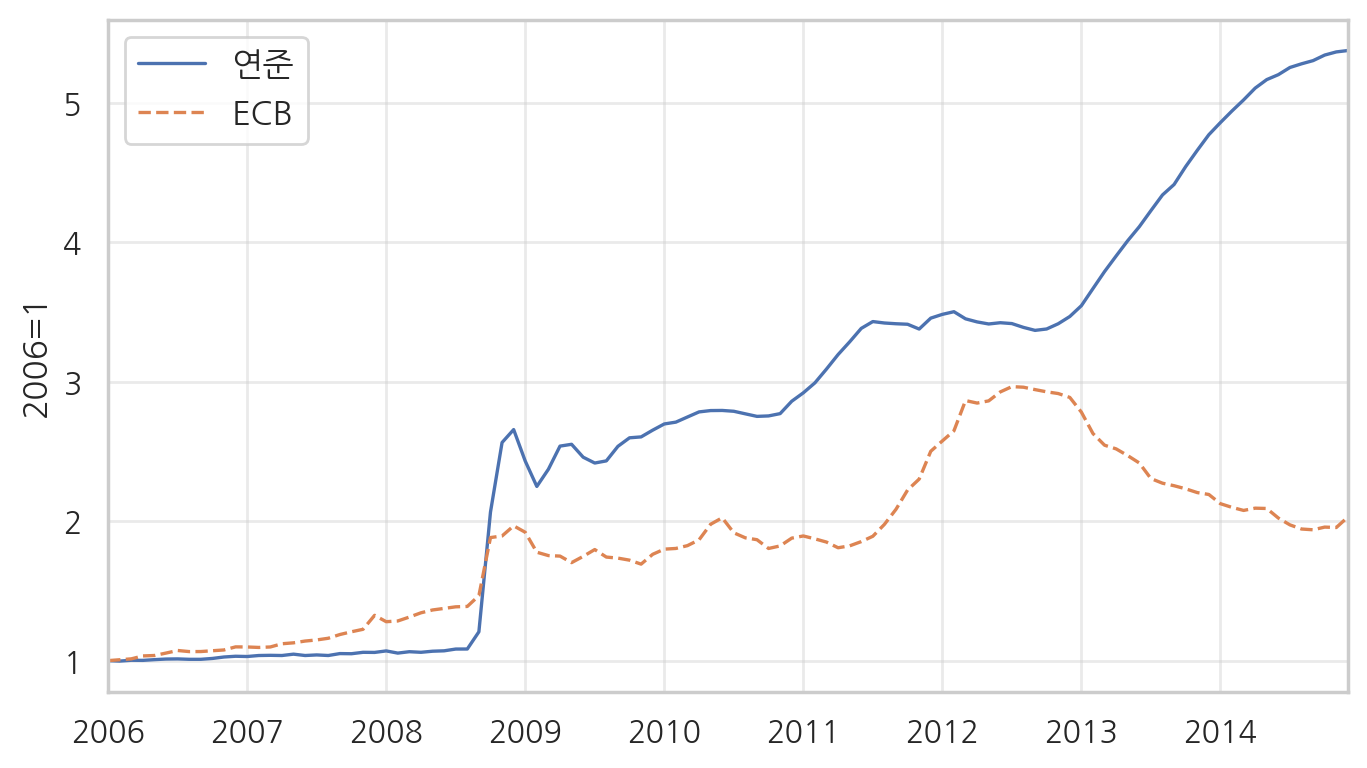

In [35]:
linewidth = 1.2

fig, ax = plt.subplots(figsize=(7,4))

df_cb_normalize.loc[:, '연준'].plot(
    ax=ax, linewidth=linewidth
)
df_cb_normalize.loc[:, 'ECB'].plot(
    ax=ax, linestyle='--', linewidth=linewidth
)

ax.legend(['연준','ECB'], fontsize=12, loc='upper left')
ax.set_xlabel('')
ax.set_ylabel('2006=1', rotation=90)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(True, alpha=0.4)

save_fig('Fed_ECB_response')
plt.show()